## Load Library

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
from PIL import Image
import re
import imutils

## Capturing Image / ID Card

In [6]:
video = cv.VideoCapture(0)

while 1:
    _, frame = video.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
    norm = np.zeros((thresh.shape[0], thresh.shape[1]))
    norm = cv.normalize(thresh, norm, 0, 255, cv.NORM_MINMAX)

    cv.imshow('Video', frame)
    cv.imshow('Scanning', norm)

    key = cv.waitKey(1)

    if key == 27:
        break
    elif key == 32:
        cv.imwrite('id_card_image.jpg', norm)
        break


video.release()
cv.destroyAllWindows()

## Image capture preprocessing

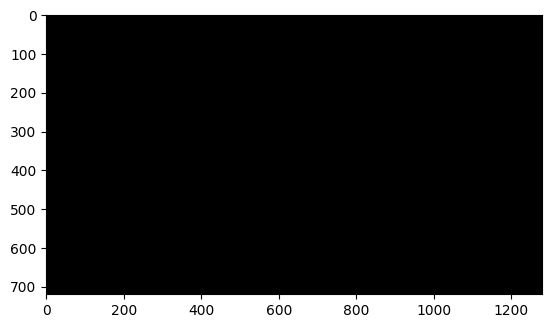

In [7]:
# read image, and normalization
id_card_image = cv.imread('id_card_image.jpg')

# remove noise
id_card_image = cv.fastNlMeansDenoisingColored(id_card_image, None, 10, 10, 7, 15)

plt.imshow(id_card_image, cmap='gray')
plt.show()

In [8]:
extraction = pytesseract.image_to_string(id_card_image, lang='ind')

if 'SMK NEGERI 7 SEMARANG' not in extraction:
    print('ID Card not recognized')
    exit(1)

data = {'nama': '', 'nis': ''}
print(extraction)
for item in extraction.split('\n'):
    if 'Nama' in item:
        data['nama'] = re.sub("([\s\S])*:", '', item).strip()
    if 'NIS' in item:
        data['nis'] = re.sub('\/[\s\S]*', '', re.sub("([\s\S])*:", '', item).strip())


print(data)

ID Card not recognized

{'nama': '', 'nis': ''}
